<div class="alert alert-block alert-info">
    <h2 align="center">Youtube data analysis</h2>
    <h4 align="center"><a href="https://t.me/afsharino">Mohammad Afshari</a></h4>
</div>

<style>
.aligncenter {
    text-align: center;
}
</style>
<p class="aligncenter">
    <img src = "https://www.playcentral.de/wp-content/uploads/2014/09/YouTube-icon-full_color-1.jpg"  width=70%>
</p>

# overview of dataset
+ video_id: A unique identifier for each video file          
+ title: Title of each video file              
+ publishedAt: The date and time in which the video is published       
+ channelId: A unique identifier for each channel
+ channelTitle: Title of the video publisher channel      
+ categoryId: unique identifier for each video category      
+ trending_date: A date and time in which the video has become trended      
+ tags: Video lables               
+ view_count: Count of views of a video          
+ likes: Number of users who liked the video              
+ dislikes: Number of users who did not like the video            
+ comment_count: Count of comments of a video       
+ thumbnail_link: Video thumbnail link     
+ comments_disabled: Settings related to the possibility of users commenting on the video 
+ ratings_disabled: Settings related to the possibility of users rating the video     
+ description: Description of the video        

<div class="alert alert-block alert-warning">
    <h2 align="center">Part 1: pre-processing</h2>
</div>

<div class="alert alert-block alert-success">
    <h2 align="center">1.Import libraries</h2>
</div>

In [44]:
# Let's import packages...
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

<div class="alert alert-block alert-success">
    <h2 align="center"> 2.Load datasets and prepare data</h2>
</div>

In [45]:
df1 = pd.read_csv("category_ids.csv")
df2 = pd.read_csv("US_youtube_trending_data.csv")

we can use following commands to know:
+ type: returns the type of the specified object
+ shape:  We use shape attribute of dataframes to know dimention of the relations.

+ dtypes: We use dtypes attribute of dataframes to know type of each attribute.

+ notna(): This method returns a DataFrame object where all the values are replaced with a Boolean value True for NOT NA (not-a -number) values, and otherwise False.

+ sum():This method adds all values in each column and returns the sum for each column.

+ notna().sum(): Therby this command will return a serie in which we can see number of not-nan data in each column.




In [46]:
# type(df2)
# df2.shape 
# df2.dtypes
# df2.notna().sum()
# df2.columns
# df2.dtypes.value_counts()

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           16798 non-null  object
 1   title              16798 non-null  object
 2   publishedAt        16798 non-null  object
 3   channelId          16798 non-null  object
 4   channelTitle       16798 non-null  object
 5   categoryId         16798 non-null  int64 
 6   trending_date      16798 non-null  object
 7   tags               16798 non-null  object
 8   view_count         16798 non-null  int64 
 9   likes              16798 non-null  int64 
 10  dislikes           16798 non-null  int64 
 11  comment_count      16798 non-null  int64 
 12  thumbnail_link     16798 non-null  object
 13  comments_disabled  16798 non-null  bool  
 14  ratings_disabled   16798 non-null  bool  
 15  description        16707 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

instead of all above commands we can use info method for same informations.

info give us an overview about data. as we can see this dataset has 16 columns and 16798 tuples
we can understand from this info that for all attributes of this relation there is no null data except
the last one "description" which has 91 missing data and we should clean it

In [48]:
df1.head()

,categoryId,category
0,2,Autos & Vehicles
1,1,Film & Animation
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [49]:
df2.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


<div class="alert alert-block alert-success">
    <h2 align="center"> 3.Remove columns with unvaluable data</h2>
</div>

In [50]:
# remove specified features from the dataset using drop method.
df2.drop(columns=["video_id", "channelId", "thumbnail_link","comments_disabled",\
                  "ratings_disabled", "description"], inplace=True)

after droping unvaluable columns we check columns aganin to be sure that dropping is done.

In [51]:
df2.columns

Index(['title', 'publishedAt', 'channelTitle', 'categoryId', 'trending_date',
       'tags', 'view_count', 'likes', 'dislikes', 'comment_count'],
      dtype='object')

<div class="alert alert-block alert-success">
    <h2 align="center"> 4.Use datetime library</h2>
</div>

In [52]:
# Convert string types to datetime
df2["publishedAt"] = [ dt.strptime(date, "%Y-%m-%dT%H:%M:%SZ") for date in df2["publishedAt"]]
df2["trending_date"] = [ dt.strptime(date, "%Y-%m-%dT%H:%M:%SZ") for date in df2["trending_date"]]

df2.head(3)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221


In [53]:
df2["date_published"] = df2["publishedAt"].dt.date
df2["time_published"] = df2["publishedAt"].dt.time

In [54]:
df2["date_trending"] = df2["trending_date"].dt.date
df2["time_trending"] = df2["trending_date"].dt.time

In [55]:
df2.dtypes

title                     object
publishedAt       datetime64[ns]
channelTitle              object
categoryId                 int64
trending_date     datetime64[ns]
tags                      object
view_count                 int64
likes                      int64
dislikes                   int64
comment_count              int64
date_published            object
time_published            object
date_trending             object
time_trending             object
dtype: object

As we can see type of "publishedAt" and "trending_date" is datetime64, but "date_published", "time_published", "date_trending" and "time_trending" are objects.

<div class="alert alert-block alert-success">
    <h2 align="center"> 5.Months that a video is published or  trended</h2>
</div>

In [56]:
df2["date_published"] = pd.to_datetime(df2["date_published"])
df2["month_published"] = df2["date_published"].dt.month
df2['month_published'].replace([8, 9, 10, 11], ['Aug', 'Sept', 'Oct', 'Nov'], inplace=True)

df2["date_trending"] = pd.to_datetime(df2["date_trending"])
df2["month_trending"] = df2["date_trending"].dt.month
df2['month_trending'].replace([8, 9, 10, 11], ['Aug', 'Sept', 'Oct', 'Nov'], inplace=True)

In [57]:
df2.dtypes

title                      object
publishedAt        datetime64[ns]
channelTitle               object
categoryId                  int64
trending_date      datetime64[ns]
tags                       object
view_count                  int64
likes                       int64
dislikes                    int64
comment_count               int64
date_published     datetime64[ns]
time_published             object
date_trending      datetime64[ns]
time_trending              object
month_published            object
month_trending             object
dtype: object

In [58]:
df2.head(2)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,date_published,time_published,date_trending,time_trending,month_published,month_trending
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug


<div class="alert alert-block alert-success">
    <h2 align="center">6.Lag between publish and trend time</h2>
</div>

In [59]:
df2["lag"] = df2["date_trending"] - df2["date_published"]
df2.head(4)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,date_published,time_published,date_trending,time_trending,month_published,month_trending,lag
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug,1 days
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug,1 days
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug,1 days
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,2020-08-11,16:38:55,2020-08-12,00:00:00,Aug,Aug,1 days


<div class="alert alert-block alert-success">
    <h2 align="center"> 7- Map categoryId to categoryName</h2>
</div>

In [60]:
df1.set_index("categoryId",inplace=True)
df2.insert(5,"category_name",df2["categoryId"])
df2["category_name"] = df2["category_name"].apply(lambda x: df1.loc[x]["category"])

In [61]:
df2.head(3)

,title,publishedAt,channelTitle,categoryId,trending_date,category_name,tags,view_count,likes,dislikes,comment_count,date_published,time_published,date_trending,time_trending,month_published,month_trending,lag
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,Brawadis,22,2020-08-12,People & Blogs,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug,1 days
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,Apex Legends,20,2020-08-12,Gaming,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug,1 days
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06,jacksepticeye,24,2020-08-12,Entertainment,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug,1 days


<div class="alert alert-block alert-success">
    <h2 align="center"> 8.Change name of some features </h2>
</div>

In [62]:
df2.rename(columns={"channelTitle":"channel", "categoryId":"category",\
            "view_count":"views", "comment_count":"comments"}, inplace=True)
df2.columns

Index(['title', 'publishedAt', 'channel', 'category', 'trending_date',
       'category_name', 'tags', 'views', 'likes', 'dislikes', 'comments',
       'date_published', 'time_published', 'date_trending', 'time_trending',
       'month_published', 'month_trending', 'lag'],
      dtype='object')

<div class="alert alert-block alert-success">
    <h2 align="center"> 9.Drop duplicate data </h2>
</div>

In [63]:
print(df2.duplicated(subset="title").value_counts())
df2.drop_duplicates(subset="title", keep="first", inplace=True)
print(df2.duplicated(subset="title").value_counts())

True     13258
False     3540
dtype: int64
False    3540
dtype: int64


<div class="alert alert-block alert-warning">
    <h2 align="center">Part 2: EDA</h2>
</div>

<div class="alert alert-block alert-success">
    <h2 align="center">10.Sort data based on likes in decending order</h2>
</div>

In [64]:
df2.sort_values(by="likes", ascending=False, inplace=True)
df2.head(3)

,title,publishedAt,channel,category,trending_date,category_name,tags,views,likes,dislikes,comments,date_published,time_published,date_trending,time_trending,month_published,month_trending,lag
1800,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10,Big Hit Labels,10,2020-08-21,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,2020-08-21,03:58:10,2020-08-21,00:00:00,Aug,Aug,0 days
3200,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28 04:00:11,BLACKPINK,10,2020-08-28,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,51234434,5912778,405329,1847794,2020-08-28,04:00:11,2020-08-28,00:00:00,Aug,Aug,0 days
10201,BLACKPINK – ‘Lovesick Girls’ M/V,2020-10-02 04:00:13,BLACKPINK,10,2020-10-02,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,39363127,4746270,17513,1021283,2020-10-02,04:00:13,2020-10-02,00:00:00,Oct,Oct,0 days


<div class="alert alert-block alert-success">
    <h2 align="center">11.Show how many videos were published each day in the dataset</h2>
</div>

In [65]:
count_of_published_each_day = df2[["title", "date_published"]].\
groupby("date_published").count().rename(columns={"title":"count_of_published_video"})
count_of_published_each_day

,count_of_published_video
date_published,
2020-08-03,1
2020-08-05,4
2020-08-06,22
2020-08-07,34
2020-08-08,29
...,...
2020-10-31,32
2020-11-01,27
2020-11-02,37


<div class="alert alert-block alert-success">
    <h2 align="center">12.Ploting the above result. is there a correlation between weekdays and publish days?</h2>
</div>

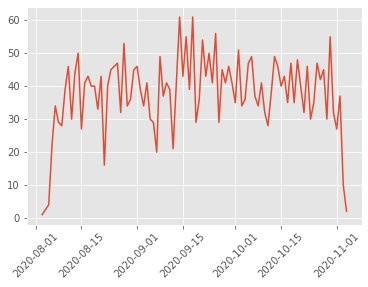

In [66]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.plot(count_of_published_each_day["count_of_published_video"])
plt.xticks(rotation=45)
plt.show()

### From the above plot we could understand that the trend of publishing video is bullish at the start of the mont but from the middle, it starts growing up.

<div class="alert alert-block alert-success">
    <h2 align="center">13. </h2>
</div>

In [67]:
publish_aug = df2[df2["month_published"] == "Aug"]["title"].count()
publish_sept = df2[df2["month_published"] == "Sept"]["title"].count()
publish_oct = df2[df2["month_published"] == "Oct"]["title"].count()
publish_nov = df2[df2["month_published"] == "Nov"]["title"].count()

trend_aug = df2[df2["month_trending"] == "Aug"]["title"].count()
trend_sept = df2[df2["month_trending"] == "Sept"]["title"].count()
trend_oct = df2[df2["month_trending"] == "Oct"]["title"].count()
trend_nov = df2[df2["month_trending"] == "Nov"]["title"].count()

view_aug = df2[df2["month_published"] == "Aug"]["views"].sum()
view_sept = df2[df2["month_published"] == "Sept"]["views"].sum()
view_oct = df2[df2["month_published"] == "Oct"]["views"].sum()
view_nov = df2[df2["month_published"] == "Nov"]["views"].sum()

monthly_statistics = pd.DataFrame({
    'published': [publish_aug, publish_sept, publish_oct, publish_nov],
    'trending': [trend_aug, trend_sept, trend_oct, trend_nov],
    'views': [view_aug, view_sept, view_oct, view_nov]
}, index=["Aug", "Sept", "Oct", "Nov"])
monthly_statistics

,published,trending,views
Aug,988,943,1455745669
Sept,1237,1236,1462007478
Oct,1239,1217,1735868034
Nov,76,144,84883540


<div class="alert alert-block alert-success">
    <h2 align="center">14.Plot histogram of lag column and analyse it </h2>
</div>

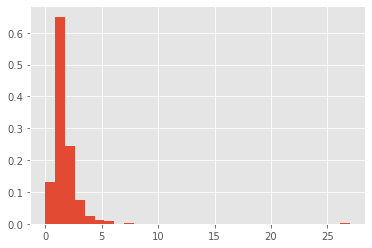

In [68]:
lag_data = df2["lag"].dt.days
plt.style.use('ggplot')
plt.hist(lag_data, density=True, bins=31)
plt.show()


### only few videos exist that the lag between publishing and trending of them is more than 5 days, this shows that how youtube is affecting on video views.

<div class="alert alert-block alert-success">
    <h2 align="center">15.Design a UI which Indicate the number of videos released in the specified month at the user's request. </h2>
</div>

In [69]:
while True:
    try:
        user_input1 = input("month for most liked videos(Aug, Sept, Oct, Nov)?")
        if user_input1 not in ["Aug", "Sept", "Oct", "Nov"]:
            print("input valid month name")
        else:
            user_input2 = int(input("How many videos to see? "))
            break
    except:
        print("invalid parameter try again!!")
        
most_liked_videos = df2[df2['month_published'] == user_input1]
most_liked_videos = most_liked_videos.sort_values("likes", ascending=False)
most_liked_videos.head(user_input2)

month for most liked videos(Aug, Sept, Oct, Nov)?Sept
How many videos to see? 5


,title,publishedAt,channel,category,trending_date,category_name,tags,views,likes,dislikes,comments,date_published,time_published,date_trending,time_trending,month_published,month_trending,lag
4421,[CHOREOGRAPHY] BTS (방탄소년단) 'Dynamite' Dance Pr...,2020-09-02 10:00:01,BANGTANTV,10,2020-09-03,Music,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,10404157,2318704,12619,99519,2020-09-02,10:00:01,2020-09-03,00:00:00,Sept,Sept,1 days
9226,BTS (방탄소년단) 'Dynamite' Official MV (Choreograp...,2020-09-26 01:00:01,Big Hit Labels,10,2020-09-27,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,10825271,2149219,20520,82853,2020-09-26,01:00:01,2020-09-27,00:00:00,Sept,Sept,1 days
8202,BTS: Tiny Desk (Home) Concert,2020-09-21 13:00:11,NPR Music,10,2020-09-22,Music,NPR|NPR Music|National Public Radio|Live|Perfo...,7108389,1412601,8935,130134,2020-09-21,13:00:11,2020-09-22,00:00:00,Sept,Sept,1 days
9867,BLACKPINK - 'Lovesick Girls' Concept Teaser Video,2020-09-28 07:00:08,BLACKPINK,10,2020-09-30,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,9077709,1404195,20760,73183,2020-09-28,07:00:08,2020-09-30,00:00:00,Sept,Sept,2 days
8630,BTS (방탄소년단) Speech at the 75th UN General Asse...,2020-09-23 13:55:48,BANGTANTV,10,2020-09-24,Music,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,5385727,1381352,4064,80211,2020-09-23,13:55:48,2020-09-24,00:00:00,Sept,Sept,1 days


<div class="alert alert-block alert-success">
    <h2 align="center">16.1.Sort dataset based on trended month </h2>
</div>

In [70]:
channels = df2[['channel', 'views', 'month_trending']]
channels = channels.drop_duplicates(subset='channel', keep='first')
channels.sort_values(by="month_trending", ascending=True, inplace=True)
channels.set_index("channel", inplace=True)
channels

,views,month_trending
channel,,
Big Hit Labels,57229275,Aug
Optus Sport,1846466,Aug
Ty Dolla $ign,694116,Aug
Ask A Mortician,324208,Aug
YuridiaVEVO,1017631,Aug
...,...,...
Mike Boyd,446589,Sept
Monster Hunter,600764,Sept
Wizarding World,459241,Sept


<div class="alert alert-block alert-success">
    <h2 align="center">16.2.Top 10 of Aug </h2>
</div>

In [71]:
Aug_channels = channels[channels["month_trending"] == "Aug"]
Aug_channels = Aug_channels.sort_values("views", ascending=False )
Aug_channels.head(10)

,views,month_trending
channel,,
Cardi B,76805026,Aug
Big Hit Labels,57229275,Aug
BLACKPINK,51234434,Aug
TREASURE (트레저),18534845,Aug
Warner Bros. Pictures,13849593,Aug
MrBeast Gaming,13073796,Aug
BlackEyedPeasVEVO,13025541,Aug
Nike,11788350,Aug
KQ ENTERTAINMENT,10914447,Aug


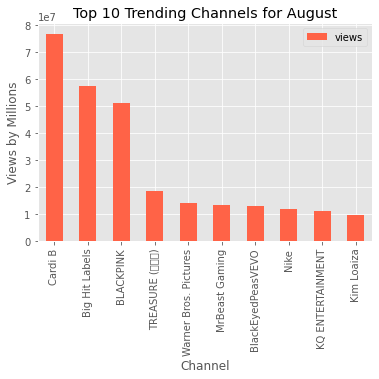

In [73]:
Aug_channels.head(10).plot(kind="bar", facecolor="tomato")
aug_x_axis = Aug_channels.index
aug_y_axis = Aug_channels['views']
plt.title("Top 10 Trending Channels for August")
plt.ylabel("Views by Millions")
plt.xlabel("Channel")
plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">16.3.Top 10 of Sept </h2>
</div>

In [74]:
Sept_channels = channels[channels["month_trending"] == "Sept"]
Sept_channels = Sept_channels.sort_values("views", ascending=False )
Sept_channels.head(10)

,views,month_trending
channel,,
LadyGagaVEVO,19296421,Sept
Brawl Stars,14445277,Sept
J97,14429622,Sept
Magic: The Gathering,11256073,Sept
RauwAlejandroTv,10900724,Sept
Kimberly Loaiza,10862957,Sept
Dude Perfect,9133110,Sept
CLC 씨엘씨 (Official YouTube Channel),8919787,Sept
Wisin,8348028,Sept


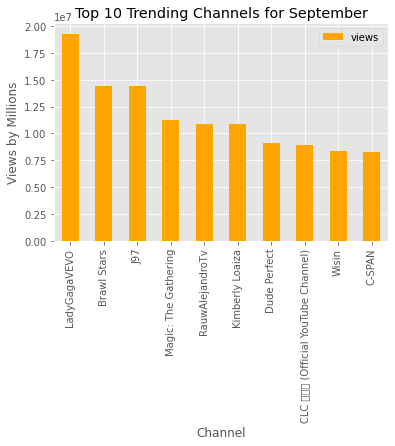

In [76]:
Sept_channels.head(10).plot(kind="bar", facecolor="orange")
sept_x_axis = Sept_channels.index
sept_y_axis = Sept_channels['views']
plt.title("Top 10 Trending Channels for September")
plt.ylabel("Views by Millions")
plt.xlabel("Channel")
plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">16.4.Top 10 of Oct </h2>
</div>

In [77]:
Oct_channels = channels[channels["month_trending"] == "Oct"]
Oct_channels = Oct_channels.sort_values("views", ascending=False )
Oct_channels.head(10)

,views,month_trending
channel,,
Zee Music Company,30452631,Oct
Apple,24125686,Oct
Hornstromp Games,16594442,Oct
BANGTANTV,16398436,Oct
HarryStylesVEVO,16062539,Oct
MrBeast,13372258,Oct
MBCkpop,12067869,Oct
Walmart,11624348,Oct
The Pixel Kingdom,10500277,Oct


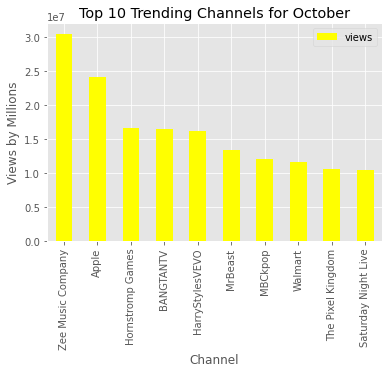

In [78]:
Oct_channels.head(10).plot(kind="bar", facecolor="yellow")
oct_x_axis = Oct_channels.index
oct_y_axis = Oct_channels['views']
plt.title("Top 10 Trending Channels for October")
plt.ylabel("Views by Millions")
plt.xlabel("Channel")
plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">16.5.Top 10 of Nov </h2>
</div>

In [79]:
Nov_channels = channels[channels["month_trending"] == "Nov"]
Nov_channels = Nov_channels.sort_values("views", ascending=False )
Nov_channels.head(10)

,views,month_trending
channel,,
James Charles,11774104,Nov
charli d'amelio,6117906,Nov
LARRAY,5408222,Nov
Serie A,5323957,Nov
Jaiden Animations,3885698,Nov
Noah Beck,3885199,Nov
Sech,3843772,Nov
Chase Hudson,3582436,Nov
MAMAMOO,3569905,Nov


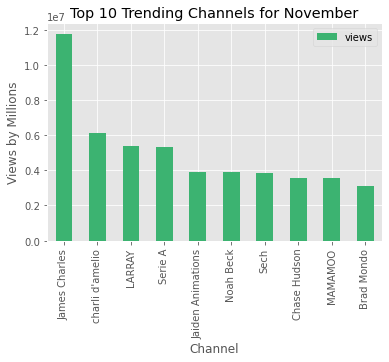

In [80]:
Nov_channels.head(10).plot(kind="bar", facecolor="mediumseagreen")
nov_x_axis = Nov_channels.index
nov_y_axis = Nov_channels['views']
plt.title("Top 10 Trending Channels for November")
plt.ylabel("Views by Millions")
plt.xlabel("Channel")
plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">17.Users opinion based on each category </h2>
</div>

In [81]:
categories = df2[["category_name", "title"]].groupby("category_name").count().rename(
    columns={'title': 'number_published'}).sort_values('number_published', ascending=False)

categories['likes'] = df2[["category_name", "likes"]].groupby("category_name").sum()

categories['dislikes'] = df2[["category_name", "dislikes"]].groupby("category_name").sum()

categories["total_opinions"] = categories["likes"] + categories["dislikes"]

categories["% like"] = (categories["likes"] / categories["total_opinions"])*100
categories["% dislike"] = (categories["dislikes"] / categories["total_opinions"])*100
categories

,number_published,likes,dislikes,total_opinions,% like,% dislike
category_name,,,,,,
Music,798,162883104,3056306,165939410,98.158180,1.841820
Entertainment,655,75892510,1182896,77075406,98.465274,1.534726
Sports,502,12302820,376952,12679772,97.027139,2.972861
Gaming,311,34832291,838494,35670785,97.649354,2.350646
People & Blogs,270,25751825,516844,26268669,98.032470,1.967530
Comedy,211,21223879,185739,21409618,99.132451,0.867549
Science & Technology,180,11060001,341410,11401411,97.005546,2.994454
News & Politics,153,2357393,318359,2675752,88.102074,11.897926
Howto & Style,149,7833598,209918,8043516,97.390221,2.609779


<div class="alert alert-block alert-success">
    <h2 align="center">18.plot count of published videos in each category</h2>
</div>

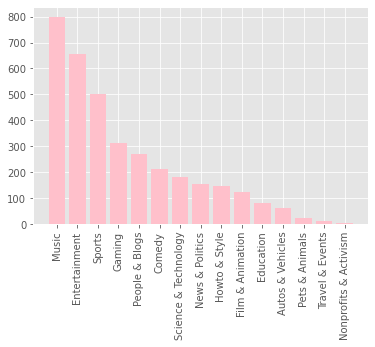

In [37]:
x_axis = categories.index
y_axis = categories['number_published']
plt.bar(x_axis, y_axis, color='pink')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">19.Users reaction to published videos in same day but different months</h2>
</div>

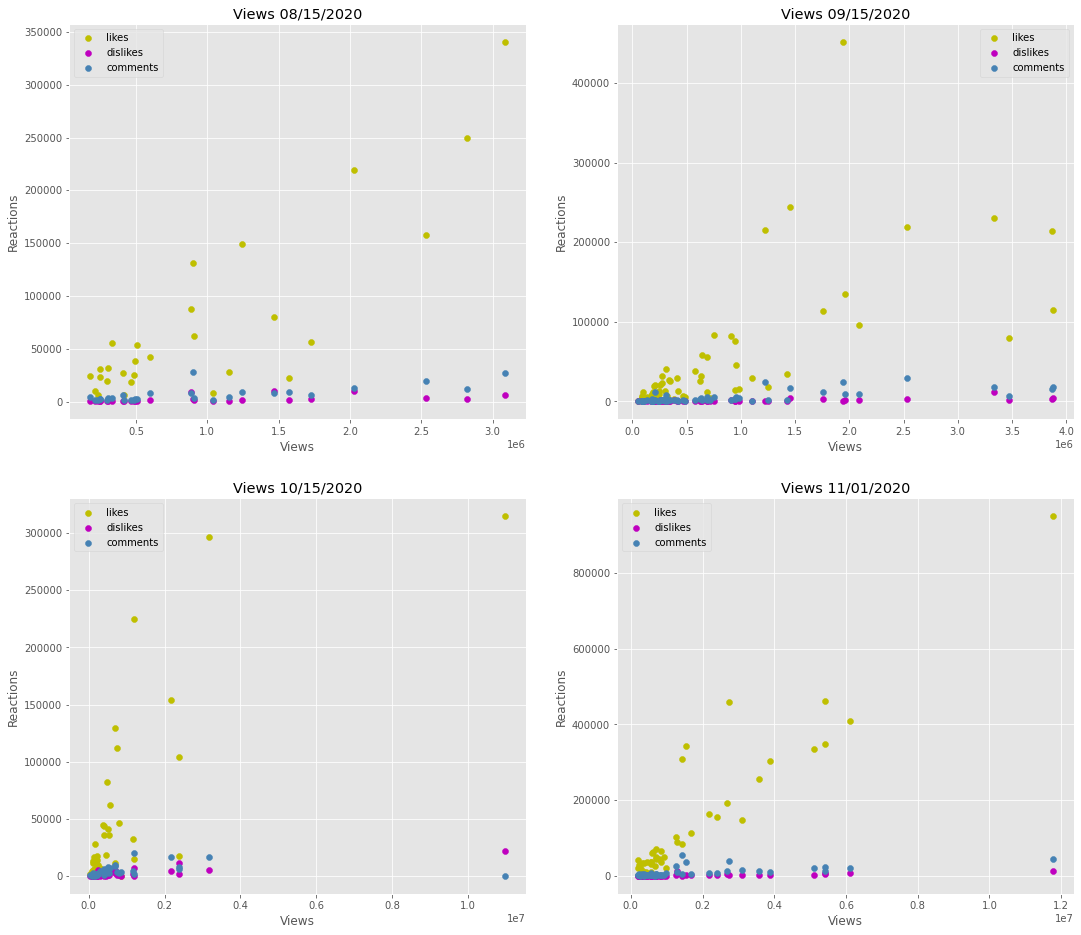

In [82]:
fig, ax = plt.subplots(2, figsize=(18, 16))

df = df2
df = df[df["date_trending"] == "2020-08-15"]
ax = plt.subplot(2, 2, 1)
ax.scatter(df['views'], df['likes'], color='y')
ax.scatter(df['views'], df['dislikes'], color='m')
ax.scatter(df['views'], df['comments'], color='steelblue')
ax.set(title='Views 08/15/2020', ylabel='Reactions', xlabel='Views')
ax.legend(['likes', 'dislikes', 'comments'])

df = df2
df = df[df['date_trending'] == '2020-09-15']
ax = plt.subplot(2, 2, 2)
ax.scatter(df['views'], df['likes'], color='y')
ax.scatter(df['views'], df['dislikes'], color='m')
ax.scatter(df['views'], df['comments'], color='steelblue')
ax.set(title='Views 09/15/2020', ylabel='Reactions', xlabel='Views')
ax.legend(['likes', 'dislikes', 'comments'])

df = df2
df = df[df['date_trending'] == '2020-10-15']
ax = plt.subplot(2, 2, 3)
ax.scatter(df['views'], df['likes'], color='y')
ax.scatter(df['views'], df['dislikes'], color='m')
ax.scatter(df['views'], df['comments'], color='steelblue')
ax.set(title='Views 10/15/2020', ylabel='Reactions', xlabel='Views')
ax.legend(['likes', 'dislikes', 'comments'])


df = df2
df = df[df['date_trending'] == '11/01/2020']
ax = plt.subplot(2, 2, 4)
ax.scatter(df['views'], df['likes'], color='y')
ax.scatter(df['views'], df['dislikes'], color='m')
ax.scatter(df['views'], df['comments'], color='steelblue')
ax.set(title='Views 11/01/2020', ylabel='Reactions', xlabel='Views')
ax.legend(['likes', 'dislikes', 'comments'])
plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">20.Top 100 videos reactions</h2>
</div>

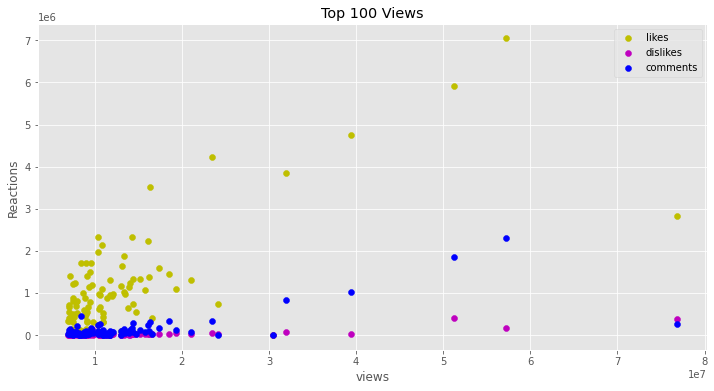

In [83]:
top_100_videos = df2.sort_values("views", ascending=False).head(100)
fig, ax = plt.subplots(1, figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
ax.scatter(top_100_videos["views"], top_100_videos["likes"], color='y')
ax.scatter(top_100_videos["views"], top_100_videos["dislikes"], color='m')
ax.scatter(top_100_videos["views"], top_100_videos["comments"], color='b')
ax.set(title="Top 100 Views", xlabel="views", ylabel="Reactions")
ax.legend(["likes", "dislikes", "comments"])
plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">21.Users Reaction to following categories.</h2>
</div>

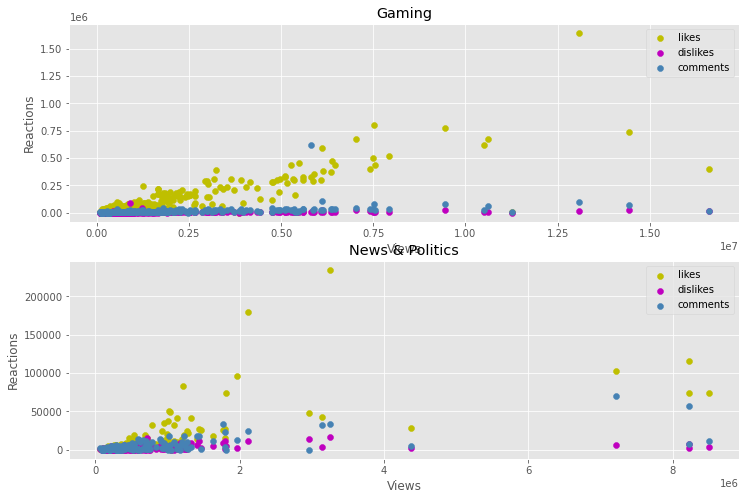

In [84]:
fig, ax = plt.subplots(1, figsize=(12, 8))
df = df2
df = df[df["category_name"] == "Gaming"]

ax = plt.subplot(2, 1, 1)
ax.scatter(df["views"], df["likes"], color='y')
ax.scatter(df["views"], df["dislikes"], color='m')
ax.scatter(df["views"], df["comments"], color='steelblue')
ax.set(title="Gaming", xlabel="Views", ylabel="Reactions")
ax.legend(["likes", "dislikes", "comments"])


df = df2
df = df[df["category_name"] == "News & Politics"]
ax = plt.subplot(2, 1, 2)
ax.scatter(df["views"], df["likes"], color='y')
ax.scatter(df["views"], df["dislikes"], color='m')
ax.scatter(df["views"], df["comments"], color='steelblue')
ax.set(title="News & Politics", xlabel="Views", ylabel="Reactions")
ax.legend(["likes", "dislikes", "comments"])

plt.show()

<div class="alert alert-block alert-success">
    <h2 align="center">22.word cloud of title attribute</h2>
</div>

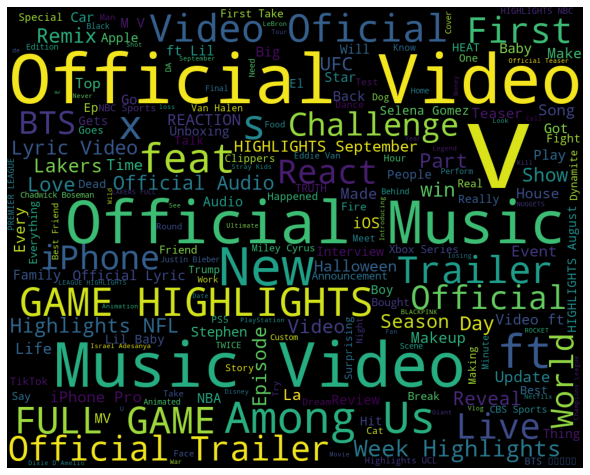

In [85]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df2["title"]:
    val = str(val)
    tokens = val.split()
    comment_words += " ".join(tokens)+" "
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

wordcloud = WordCloud(width=1000, height=800,background_color='black',stopwords=stopwords,min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

***
<h1 align="center">Finally The End :)</h1>